# Exercise of lesson 3


In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
#%pip install openpyxl

The table studied is the result of a differential expression gene (DEG) analysis. It comes from the following GEO data [GSE165691](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE165691). 

## 1. Load dataset

In [2]:
df = pd.read_excel("exercise/data/DEG_result_table.xlsx")

In [3]:
df.head()

,ensembl_gene_id,log2FoldChange,pvalue,padj,length,symbol,entrezgene,description,PR661W_Vec,PR661W_TRPM1,PR661W_TRPM1.norm.count.mean,PR661W_Vec.norm.count.mean,baseMean
0,ENSMUSG00000027750,0.844948,3.204666e-235,4.256116e-231,8702,Postn,50706,"periostin, osteoblast specific factor [Source:...",5192.916456,9327.516658,9327.516658,5192.916456,7260.216557
1,ENSMUSG00000032332,1.012135,2.993412e-148,1.987775e-144,15228,Col12a1,12816,"collagen, type XII, alpha 1 [Source:MGI Symbol...",2108.777926,4253.179793,4253.179793,2108.777926,3180.978860
2,ENSMUSG00000029661,0.838711,9.096674e-96,4.027098e-92,12426,Col1a2,12843,"collagen, type I, alpha 2 [Source:MGI Symbol;A...",2134.124390,3816.778886,3816.778886,2134.124390,2975.451638
3,ENSMUSG00000001642,-0.851705,7.978918e-74,2.649200e-70,8384,Akr1b3,11677,"aldo-keto reductase family 1, member B3 (aldos...",2283.752215,1265.494602,1265.494602,2283.752215,1774.623408
4,ENSMUSG00000029304,-0.609826,2.120973e-60,5.633728e-57,1648,Spp1,20750,secreted phosphoprotein 1 [Source:MGI Symbol;A...,3195.806439,2094.134776,2094.134776,3195.806439,2644.970607


## 2. Explore data table

In [4]:
df.shape

(13281, 13)

In [5]:
df.columns

Index(['ensembl_gene_id', 'log2FoldChange', 'pvalue', 'padj', 'length',
       'symbol', 'entrezgene', 'description', 'PR661W_Vec', 'PR661W_TRPM1',
       'PR661W_TRPM1.norm.count.mean', 'PR661W_Vec.norm.count.mean',
       'baseMean'],
      dtype='object')

There are **13281 rows (= genes)** and 13 columns. 

The columns correspond to:

- gene identifier (ensembl_gene_id)
- descriptions of the gene (length, symbol, entrezgene, description)
- results of the DEG analysis (log2FoldChange, pvalue, padj) 
- metrics about the expression of the gene in the samples (PR661W_Vec, PR661W_TRPM1, PR661W_TRPM1.norm.count.mean, PR661W_Vec.norm.count.mean, baseMean)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13281 entries, 0 to 13280
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ensembl_gene_id               13281 non-null  object 
 1   log2FoldChange                13281 non-null  float64
 2   pvalue                        13281 non-null  float64
 3   padj                          13281 non-null  float64
 4   length                        13281 non-null  int64  
 5   symbol                        13176 non-null  object 
 6   entrezgene                    11953 non-null  object 
 7   description                   13179 non-null  object 
 8   PR661W_Vec                    13281 non-null  float64
 9   PR661W_TRPM1                  13281 non-null  float64
 10  PR661W_TRPM1.norm.count.mean  13281 non-null  float64
 11  PR661W_Vec.norm.count.mean    13281 non-null  float64
 12  baseMean                      13281 non-null  float64
dtypes

**The columns symbol, entrezgene and description contain null data.** They all correspond to columns describing the gene.

In [7]:
df.describe()

,log2FoldChange,pvalue,padj,length,PR661W_Vec,PR661W_TRPM1,PR661W_TRPM1.norm.count.mean,PR661W_Vec.norm.count.mean,baseMean
count,13281.000000,1.328100e+04,1.328100e+04,13281.000000,13281.000000,13281.000000,13281.000000,13281.000000,13281.000000
mean,0.014733,6.215488e-01,9.721532e-01,5259.189368,73.838396,76.277698,76.277698,73.838396,75.058047
std,0.367930,2.780440e-01,1.489298e-01,4121.327315,183.790011,208.393918,208.393918,183.790011,194.522537
min,-3.465115,3.204666e-235,4.256116e-231,57.000000,1.016250,1.020423,1.020423,1.016250,1.018336
25%,-0.148969,4.372949e-01,9.999524e-01,2673.000000,8.129998,8.106694,8.106694,8.129998,8.187393
50%,0.009607,6.791172e-01,9.999524e-01,4346.000000,29.291903,30.045789,30.045789,29.291903,29.754884
75%,0.173428,8.549296e-01,9.999524e-01,6733.000000,76.696963,78.345811,78.345811,76.696963,77.624579
max,3.479844,9.999524e-01,9.999524e-01,123179.000000,7412.226483,9327.516658,9327.516658,7412.226483,7872.613769


**The minimum value of log2FoldChange is -3.465115, the max is 3.479844, and the mean is 0.014733.**


In [8]:
sum(df.padj < 0.05)

185

In [9]:
(df.padj < 0.05).value_counts()

padj
False    13096
True       185
Name: count, dtype: int64

There are **185 genes with padj < 0.05**.

In [10]:
((df.padj < 0.05) & (df.log2FoldChange > 1)).value_counts()

False    13242
True        39
Name: count, dtype: int64

In [11]:
((df.padj < 0.05) & (df.log2FoldChange < -1)).value_counts()

False    13264
True        17
Name: count, dtype: int64

There are **39 genes up-regulated** and **17 genes down-regulated**.

## 3. Expression of genes of interest

Here is the expression in both samples of the genes Il31ra, Sox9 and Lbp

In [12]:
df[df.symbol.isin(['Il31ra', 'Sox9', 'Lbp'])][["symbol", "PR661W_Vec", "PR661W_TRPM1"]]

,symbol,PR661W_Vec,PR661W_TRPM1
47,Lbp,49.019104,134.809218
871,Il31ra,3.168308,9.013737
1061,Sox9,42.323811,59.014464


In [13]:
max_log2FoldChange_gene = df.loc[df['log2FoldChange'].idxmax()]['symbol']
min_log2FoldChange_gene = df.loc[df['log2FoldChange'].idxmin()]['symbol']
print(
f"Gene with max log2FoldChange: {max_log2FoldChange_gene} \n\
Gene with min log2FoldChange: {min_log2FoldChange_gene}"
)

Gene with max log2FoldChange: Robo2 
Gene with min log2FoldChange: Bmp3


## 4. Histogram plots

<Axes: title={'center': 'log2FoldChange repartition'}, ylabel='Frequency'>

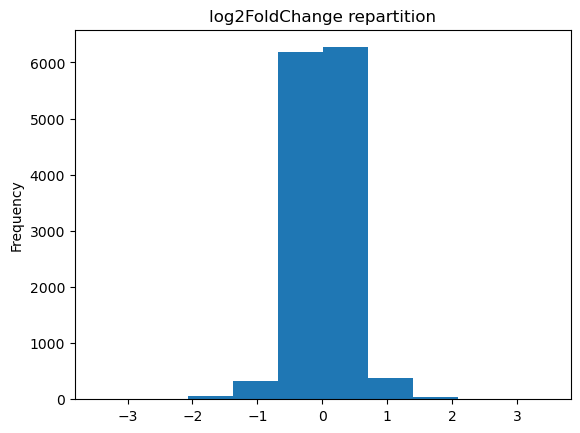

In [14]:
df.log2FoldChange.plot(kind='hist', title="log2FoldChange repartition")

# 5. Pie plot

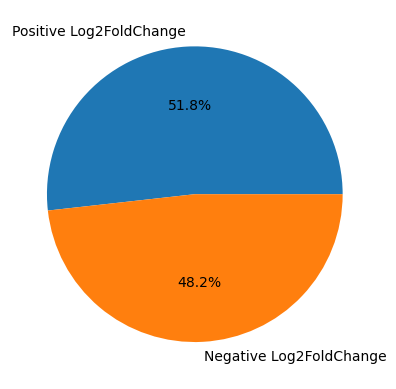

In [15]:
# Calculate the counts of positive and negative log2FoldChange genes
positive_genes_count = sum(df.log2FoldChange > 0)
negative_genes_count = sum(df.log2FoldChange < 0)

# Create a pie plot
plt.pie([positive_genes_count, negative_genes_count], labels=['Positive Log2FoldChange', 'Negative Log2FoldChange'], autopct='%1.1f%%')
plt.show()



## 6. Volcano plot 

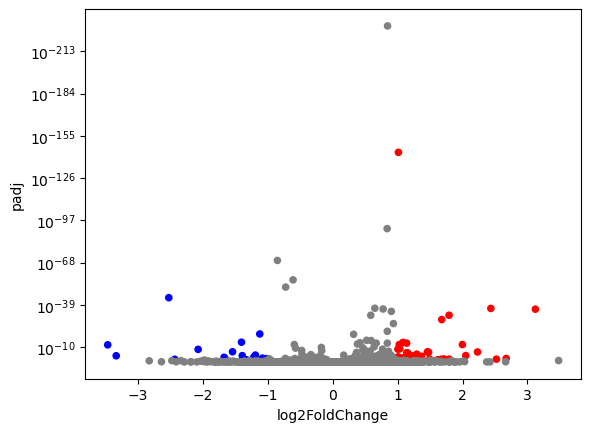

In [16]:
df["color"] = "grey"

df["color"] = df["color"].mask(((df.padj < 0.05) & (df.log2FoldChange > 1)), 'red')
df["color"] = df["color"].mask(((df.padj < 0.05) & (df.log2FoldChange < -1)), 'blue')

fig, ax = plt.subplots(1)

df.plot(kind='scatter', x='log2FoldChange', y='padj', color=df.color, ax=ax)
ax.set_yscale('log')
ax.invert_yaxis()
plt.show()

## 7. Volcano plot with interact

In [17]:
from ipywidgets import interact
from ipywidgets import widgets

def f(tlfc, tpadj):
    df["color"] = "grey"

    df["color"] = df["color"].mask(((df.padj < tpadj) & (df.log2FoldChange > tlfc)), 'red')
    df["color"] = df["color"].mask(((df.padj < tpadj) & (df.log2FoldChange < -tlfc)), 'blue')

    fig, ax = plt.subplots(1)

    df.plot(kind='scatter', x='log2FoldChange', y='padj', color=df.color, ax=ax)
    ax.set_yscale('log')
    ax.invert_yaxis()
    plt.show()

interact(f, 
        tlfc=widgets.FloatSlider(value=1, min=0, max=5, step=0.1), 
        tpadj=widgets.FloatSlider(value=0.05, min=0, max=1, step=0.01))

interactive(children=(FloatSlider(value=1.0, description='tlfc', max=5.0), FloatSlider(value=0.05, description…

<function __main__.f(tlfc, tpadj)>

## 8. Volcano plot with plotly

In [18]:
import plotly.express as px

df["color"] = "Non-significant"

df["color"] = df["color"].mask(((df.padj < 0.05) & (df.log2FoldChange > 1)), 'up-regulated')
df["color"] = df["color"].mask(((df.padj < 0.05) & (df.log2FoldChange < -1)), 'down-regulated')


fig = px.scatter(df, x="log2FoldChange", y="padj", color = "color", 
                log_y=True, hover_name="symbol", 
                hover_data=['ensembl_gene_id', 'log2FoldChange', 'padj',
                    'symbol','PR661W_Vec', 'PR661W_TRPM1',], )
fig.update_yaxes(autorange='reversed')
fig.show()

## 9. Heatmap

In [40]:
top_10 = df.sort_values('log2FoldChange', key=lambda x: abs(x), ascending=False).head(10).sort_values('log2FoldChange', ascending=False)

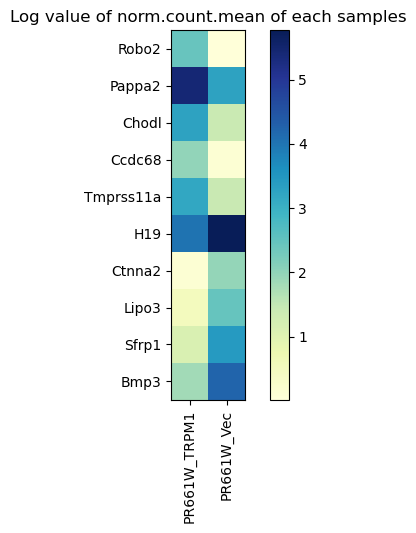

In [41]:
import numpy as np

plt.imshow(np.log(top_10[['PR661W_TRPM1.norm.count.mean', 'PR661W_Vec.norm.count.mean']]), cmap='YlGnBu')

plt.colorbar()
plt.xticks(range(2), ['PR661W_TRPM1', 'PR661W_Vec'], rotation=90)
plt.yticks(range(len(top_10)), top_10['symbol'])
plt.title("Log value of norm.count.mean of each samples")
plt.show()
